In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

### EDA

In [49]:
data=pd.read_csv('data/train (2).csv')
data.head()

,date,store,item,sales
0,22/01/2022,2002,786536,424
1,23/01/2022,2002,786536,376
2,24/01/2022,2002,786536,300
3,25/01/2022,2002,786536,210
4,25/01/2022,2002,786536,126


In [50]:
data.shape

(1009, 4)

In [51]:
data.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [52]:
data.duplicated().sum()

0

In [53]:
data.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

In [54]:
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')

data.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

In [55]:
data.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

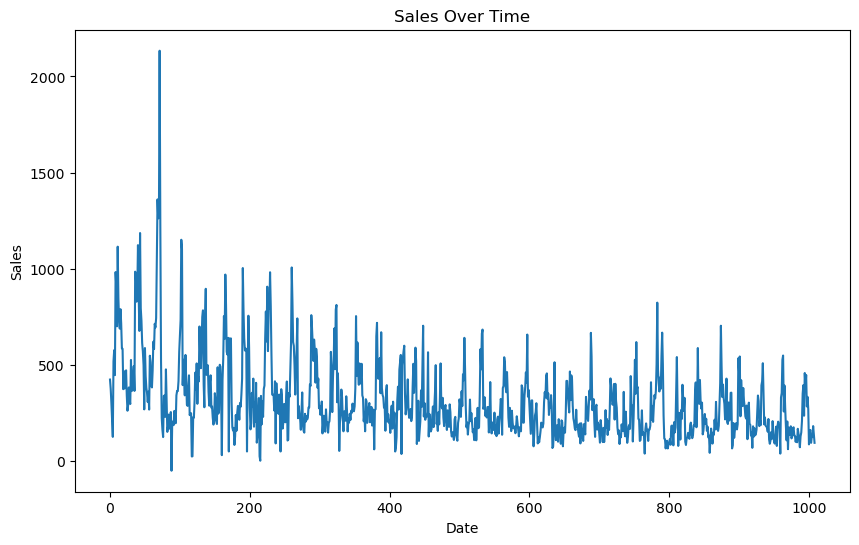

In [56]:
# Visualize the sales data
plt.figure(figsize=(10,6))
plt.plot(data.index, data['sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [58]:
data.head()

,date,store,item,sales
0,2022-01-22,2002,786536,424
1,2022-01-23,2002,786536,376
2,2022-01-24,2002,786536,300
3,2022-01-25,2002,786536,210
4,2022-01-25,2002,786536,126


### Splitting dataset

In [81]:
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['weekday'] = data['date'].dt.weekday
 
X = data[['store', 'item', 'day', 'month', 'year', 'weekday']]
y = data['sales']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modeling

In [77]:
regressors = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=47, random_state=34),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42, max_depth=5),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='linear')
}

for name, reg in regressors.items():
    reg.fit(X_train_scaled, y_train)
    y_pred = reg.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # print(f'{name} Mean Squared Error: {mse:.2f}')
    print(f'{name} R^2 Score: {r2:.2f}\n')

Linear Regression R^2 Score: 0.27

Random Forest Regressor R^2 Score: 0.74

Decision Tree Regressor R^2 Score: 0.47

KNN Regressor R^2 Score: 0.65

SVR R^2 Score: 0.17



In [79]:
#END